In [ ]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

In [ ]:
sns.countplot(x='loan_status',data=df)

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(12,4))

sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [ ]:
feat_info('installment')

In [ ]:
feat_info('loan_amnt')

In [ ]:
sns.scatterplot(x='installment', y='loan_amnt',data=df)

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

In [ ]:
df['grade'].unique()

In [ ]:
feat_info('sub_grade')
sorted(df['sub_grade'].unique())

In [ ]:
sns.countplot(x='grade', data=df, hue='loan_status')

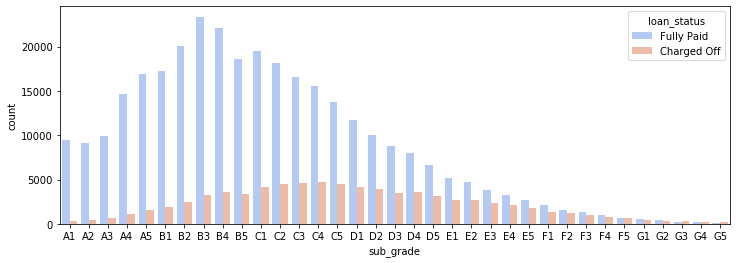

In [16]:
plt.figure(figsize=(12,4))
subo = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subo,palette='coolwarm',hue='loan_status' )

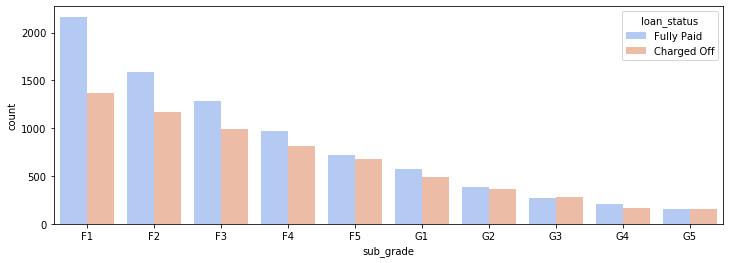

In [17]:
fg = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,4))
subo = sorted(fg['sub_grade'].unique())
sns.countplot(x='sub_grade',data=fg,order = subo,palette='coolwarm',hue='loan_status' )

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [20]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


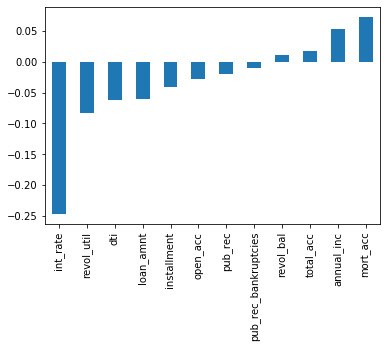

In [21]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [22]:
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [23]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [24]:
df['emp_title'].nunique()

173105

In [25]:
df['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
Sales                                1638
Project Manager                      1505
Owner                                1410
Driver                               1339
Office Manager                       1218
manager                              1145
Director                             1089
General Manager                      1074
Engineer                              995
teacher                               962
driver                                882
Vice President                        857
Operations Manager                    763
Administrative Assistant              756
Accountant                            748
President                             742
owner                                 697
Account Manager                       692
Police Officer                    

In [26]:
df = df.drop('emp_title',axis=1)

In [27]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [28]:
emp_length_order = ['< 1 year','1 year',
 
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years']

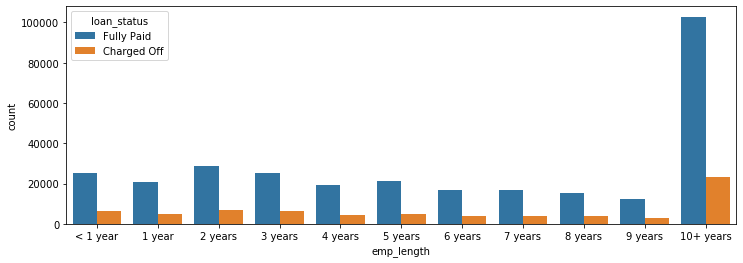

In [29]:
plt.figure(figsize=(12,4))
sns.countplot(data=df , x='emp_length',order=emp_length_order,hue='loan_status')

In [30]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']


In [31]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']


In [32]:
emp_co/emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [33]:
df = df.drop('emp_length',axis=1)

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [35]:
df = df.drop('title',axis=1)

In [36]:
feat_info('mort_acc')

Number of mortgage accounts.


In [37]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [38]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [39]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [40]:
def fma(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [41]:
df['mort_acc'] = df.apply(lambda x: fma(x['total_acc'],x['mort_acc']),axis=1)

In [42]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [43]:
df = df.dropna()

In [44]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [45]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [46]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [47]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [48]:
df = df.drop('grade',axis=1)

In [49]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True
                        )
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [50]:
#df.columns

In [51]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [52]:
df['home_ownership']= df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [53]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [54]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [55]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
5         1726 Cooper Passage Suite 129\nNorth Deniseber...
6         1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                                 USCGC Nunez\nFPO AE 30723
8                                  USCGC Tran\nFPO AP 22690
9                      3390 Luis Rue\nMauricestad, VA 00813
10                40245 Cody Drives\nBartlettfort, NM 00813
11         3126 Sean Dale Apt. 141\nSouth Matthew, MS 00813
12           4173 David Extension\nWest Beckyfort, MS 70466
13                 3343 Wells Mews\nShellychester, OR 29597
14        0472 Weber Manors Apt. 660\nLake Andrew, NH 29597
15         11629 Sean Hills Suite 614\nStevenfort, HI 30723
16        407 Briggs Lodge Suite 778\nWe

In [56]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [57]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [58]:
df = df.drop('issue_d',axis=1)

In [59]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [60]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
1998    22695
2004    20875
1997    18702
1996    18362
2005    17388
1995    16911
1994    15394
2006    15108
1993    12092
2007    11310
1992     8863
1990     8511
1991     8099
1989     7604
2008     7093
1988     6258
1987     5524
1986     4657
1985     4150
2009     3874
1984     3758
2010     3156
1983     3075
1982     2261
2011     2133
        ...  
1976      891
2012      791
1975      687
1974      606
1973      539
1972      468
1970      326
1971      310
1969      268
1967      198
1968      192
1966      117
1965      104
2013       99
1964       79
1963       60
1962       37
1961       23
1960       22
1959       17
1958       12
1955        9
1957        7
1956        7
1954        4
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
df  = df.drop('loan_status',axis=1)

In [63]:
X = df.drop('loan_repaid',axis=1).values

In [64]:
y = df['loan_repaid'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train = scaler.fit_transform(X_train)

In [69]:
X_test  =scaler.transform(X_test)

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [72]:
model = Sequential()


In [73]:
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))



model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')



Instructions for updating:
Colocations handled automatically by placer.


In [74]:
model.fit(x=X_train, y=y_train,epochs=25,batch_size=256,
         validation_data=(X_test,y_test))
model.history.history
losses = pd.DataFrame(model.history.history)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 316175 samples, validate on 79044 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
316175/316175 [==============================] - 15s 48us/sample - loss: 0.2978 - val_loss: 0.2653
Epoch 2/25
316175/316175 [==============================] - 15s 47us/sample - loss: 0.2658 - val_loss: 0.2633
Epoch 3/25
316175/316175 [==============================] - 15s 48us/sample - loss: 0.2632 - val_loss: 0.2628
Epoch 4/25
316175/316175 [==============================] - 15s 48us/sample - loss: 0.2619 - val_loss: 0.2625
Epoch 5/25
316175/316175 [==============================] - 15s 49us/sample - loss: 0.2610 - val_loss: 0.2621
Epoch 6/25
316175/316175 [==============================] - 15s 47us/sample - loss: 0.2607 - val_loss: 0.2622
Epoch 7/25
316175/316175 [==============================] - 15s 48us/sample - loss: 0.2600 - val_loss: 0.2620
Epoch 8/25
31617

316175/316175 [==============================] - 14s 43us/sample - loss: 0.2562 - val_loss: 0.2611
Epoch 2/25
316175/316175 [==============================] - 14s 45us/sample - loss: 0.2563 - val_loss: 0.2618
Epoch 3/25
316175/316175 [==============================] - 15s 47us/sample - loss: 0.2560 - val_loss: 0.2611
Epoch 4/25
316175/316175 [==============================] - 15s 48us/sample - loss: 0.2560 - val_loss: 0.2622
Epoch 5/25
316175/316175 [==============================] - 15s 46us/sample - loss: 0.2556 - val_loss: 0.2620
Epoch 6/25
316175/316175 [==============================] - 15s 46us/sample - loss: 0.2554 - val_loss: 0.2629
Epoch 7/25
316175/316175 [==============================] - 14s 44us/sample - loss: 0.2556 - val_loss: 0.2614
Epoch 8/25
316175/316175 [==============================] - 14s 44us/sample - loss: 0.2552 - val_loss: 0.2617
Epoch 9/25
316175/316175 [==============================] - 14s 46us/sample - loss: 0.2550 - val_loss: 0.2617
Epoch 10/25
316175/31

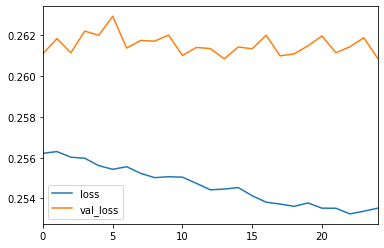

In [77]:
losses.plot()

In [78]:
losses = pd.DataFrame(model.history.history)

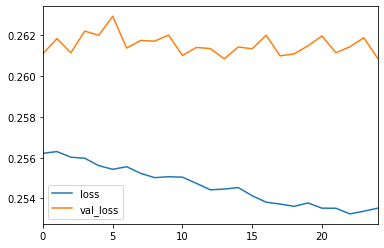

In [79]:
losses[['loss','val_loss']].plot()

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
predictions = model.predict_classes(X_test)

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [83]:
confusion_matrix(y_test,predictions)

array([[ 6864,  8794],
       [  123, 63263]])

In [84]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                              25000.00
term                                      60.00
int_rate                                  18.24
installment                              638.11
annual_inc                             61665.00
dti                                       30.11
earliest_cr_line                        1996.00
open_acc                                  16.00
pub_rec                                    0.00
revol_bal                              27778.00
revol_util                                65.50
total_acc                                 46.00
mort_acc                                   0.00
pub_rec_bankruptcies                       0.00
A2                                         0.00
A3                                         0.00
A4                                         0.00
A5                                         0.00
B1                                         0.00
B2                                         0.00
B3                                      

In [86]:
new_customer=scaler.transform(new_customer.values.reshape(1,78))

In [87]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [90]:
df.iloc[random_ind]['loan_repaid']

1.0